# Import the required Libraries

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Fetch Data

In [2]:
Loan_Train = pd.read_csv("E:/ETLHIVE/Training set of Loan status.csv")

In [3]:
Loan_Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
Loan_Train = Loan_Train.drop(["Loan_ID"],axis=1)

In [5]:
Loan_Train.shape

(614, 12)

In [6]:
Loan_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             599 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    612 non-null    float64
 6   CoapplicantIncome  613 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [7]:
Loan_Train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
Loan_Train.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Missing data handling

In [9]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [10]:
replacer(Loan_Train)

In [11]:
Loan_Train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

In [12]:
def EDA(df):
    import seaborn as sb
    import matplotlib.pyplot as plt
    cat = []
    con = []
    for i in df.columns:
        if( df[i].dtypes =="object"):
            cat.append(i)
        else:
            con.append(i)
    for i in df[con]:
        sb.boxplot(df[i],color ="g")
        plt.show()
    
        sb.distplot(df[i],color ="r")
        plt.show()

    
    for i in df[cat]:
        sb.countplot(df[i],palette = "husl")
        plt.show()

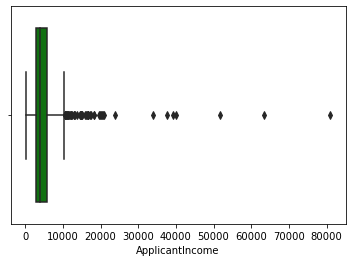

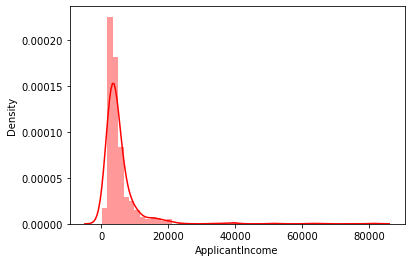

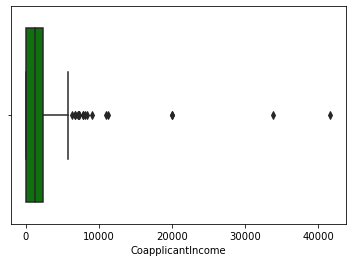

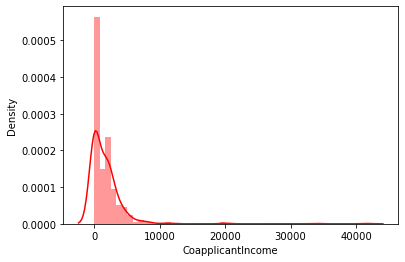

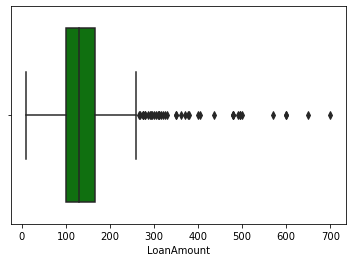

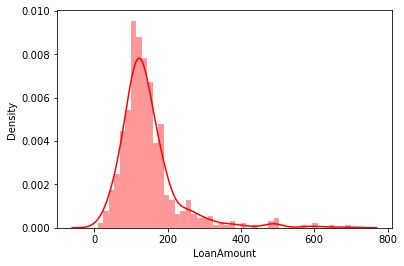

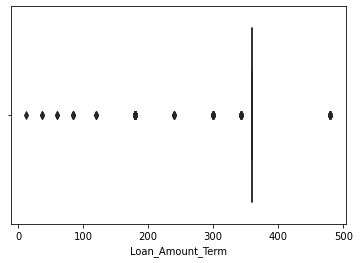

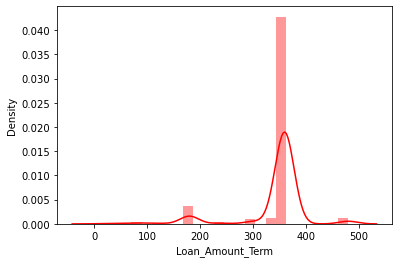

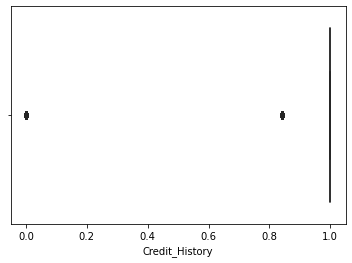

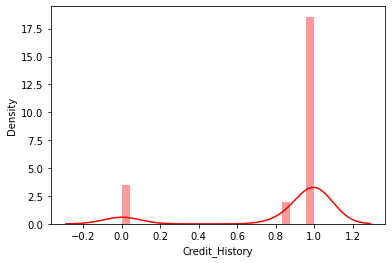

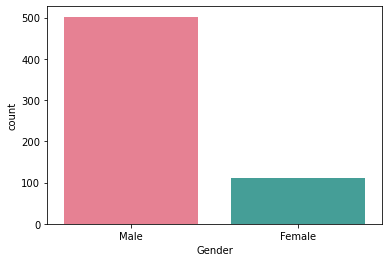

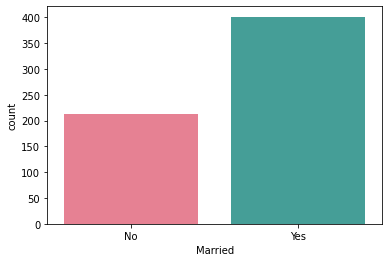

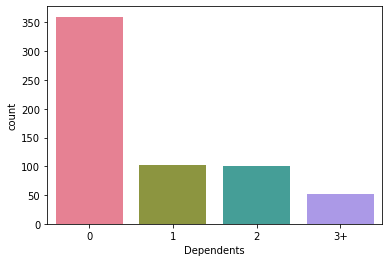

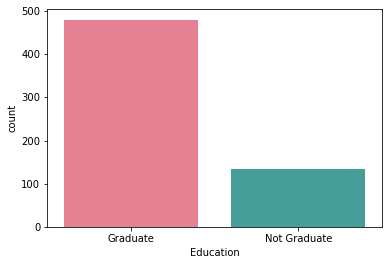

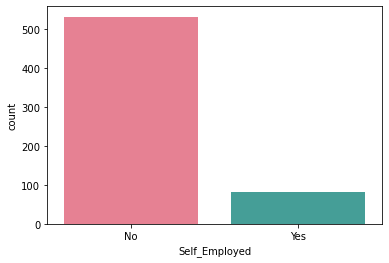

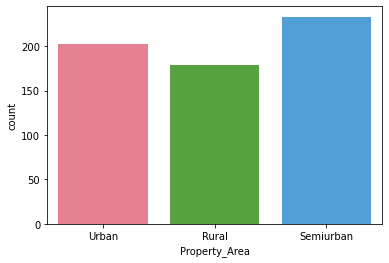

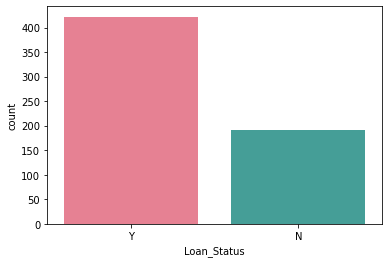

In [13]:
EDA(Loan_Train)

# Define X and Y

In [14]:
Y = Loan_Train[["Loan_Status"]]
X = Loan_Train.drop(["Loan_Status"],axis=1)

In [15]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(5), object(6)
memory usage: 52.9+ KB


In [17]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Data Preprocessing 
using one hot encoding for categorical and standardscaler for continous varibles

In [18]:
def preprocessing(df):
    import pandas as pd
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    return X3

In [19]:
Xnew = preprocessing(X)

# Oulier Treatment

In [20]:
def outliers(df):
    T = []
    for i in range(0,len(df.columns)):
        for j in range(0,df.shape[0]):
            x = df.iloc[j,i]
            if((x>3)or(x<-3)):
                T.append(j)

    from numpy import unique
    rows_del = list(unique(T))
    return rows_del

In [21]:
outliers(Xnew)

[9,
 14,
 68,
 94,
 126,
 130,
 133,
 155,
 171,
 177,
 183,
 185,
 242,
 262,
 278,
 308,
 313,
 333,
 369,
 402,
 409,
 417,
 432,
 443,
 487,
 495,
 497,
 506,
 523,
 525,
 546,
 561,
 575,
 581,
 585,
 600,
 604]

# Create Logistic Regression Model

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model_log_reg = log_reg.fit(xtrain,ytrain)

In [24]:
pred_tr = model_log_reg.predict(xtrain)
pred_ts = model_log_reg.predict(xtest)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [26]:
tr_acc

0.814663951120163

In [27]:
ts_acc

0.8130081300813008

In [28]:
confusion_matrix(ytrain,pred_tr)

array([[ 67,  87],
       [  4, 333]], dtype=int64)

In [29]:
confusion_matrix(ytest,pred_ts)

array([[20, 18],
       [ 5, 80]], dtype=int64)

# Create DecisionTree Classifier Model 

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
model_dtc = dtc.fit(xtrain,ytrain)
predtr1 = model_dtc.predict(xtrain)
predts1 = model_dtc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc1 = accuracy_score(ytrain,predtr1)
ts_acc1 = accuracy_score(ytest,predts1)

In [31]:
tr_acc1

1.0

In [32]:
ts_acc1

0.6910569105691057

# Decision Tree Model has good training accuracy but give bad testing accuracy - model is overfitted
so we use prunning to overcome this overfitting, for that we use "min samples leaf" Hyperparameter

In [33]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_leaf":range(2,60,1)}
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 34}

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=34)
model1 = dtc.fit(xtrain,ytrain)
predtr1 = model_dtc.predict(xtrain)
predts1 = model_dtc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc1 = accuracy_score(ytrain,predtr1)
ts_acc1 = accuracy_score(ytest,predts1)

In [35]:
tr_acc1

1.0

In [36]:
ts_acc1

0.6910569105691057

# Create Random Forest classifier model

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 21)
model_rfc = rfc.fit(xtrain,ytrain)
predtr2 = model_rfc.predict(xtrain)
predts2 = model_rfc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc2 = accuracy_score(ytrain,predtr2)
ts_acc2 = accuracy_score(ytest,predts2)

In [38]:
tr_acc2

1.0

In [39]:
ts_acc2

0.7804878048780488

# Random Forest Model has good training accuracy but give bad testing accuracy - model is overfitted
#so we use prunning to overcome this overfitting, for that we use "n_estimators" Hyperparameter

In [40]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
rfc = RandomForestClassifier(random_state = 21)
cv1 = GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvmodel1 = cv1.fit(xtrain,ytrain)
cvmodel1.best_params_

{'n_estimators': 9}

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=9,random_state = 21,min_samples_leaf=34)
model_rfc = rfc.fit(xtrain,ytrain)
predtr2 = model_rfc.predict(xtrain)
predts2 = model_rfc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc2 = accuracy_score(ytrain,predtr2)
ts_acc2 = accuracy_score(ytest,predts2)

In [42]:
tr_acc2

0.8065173116089613

In [43]:
ts_acc2

0.8211382113821138

# Create Adaboost model

In [44]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))
model_abc = abc.fit(xtrain,ytrain)
predtr3 = model_abc.predict(xtrain)
predts3 = model_abc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc3 = accuracy_score(ytrain,predtr3)
ts_acc3 = accuracy_score(ytest,predts3)


In [45]:
tr_acc3

1.0

In [46]:
ts_acc3

0.6991869918699187

# Adaboost Model has good training accuracy but give bad testing accuracy - model is overfitted
so we use prunning to overcome this overfitting, for that we use "n_estimators" Hyperparameter

In [47]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))
cv1 = GridSearchCV(abc,tg,scoring="accuracy",cv=4)
cvmodel2 = cv1.fit(xtrain,ytrain)
cvmodel2.best_params_

{'n_estimators': 7}

In [48]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,min_samples_leaf=34),n_estimators=7)
model_abc = abc.fit(xtrain,ytrain)
predtr3 = model_abc.predict(xtrain)
predts3 = model_abc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc3 = accuracy_score(ytrain,predtr3)
ts_acc3 = accuracy_score(ytest,predts3)

In [49]:
tr_acc3

0.8818737270875764

In [50]:
ts_acc3

0.7479674796747967

# Prepare test Data set

In [51]:
test_data = pd.read_csv("E:/ETLHIVE/testing_set_Loan_status.csv")

In [52]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [53]:
test = test_data.drop(["Loan_ID"],axis=1)

In [54]:
test.isna().sum() # check any missing values in data set

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [55]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [56]:
replacer(test) # replace missing values, if missing value is categorical then is mode and for continous use mean value

In [57]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Data Preprocessing on test Data set

In [58]:
def preprocessing(df):
    import pandas as pd
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    return X3

In [59]:
xtest = preprocessing(test)

# 1) Logistic regression model for prediction

In [60]:
pred_test_data = model_log_reg.predict(xtest)

In [61]:
Predication = test_data[["Loan_ID"]]

In [62]:
Predication["Loan_Status_predication"] = pred_test_data

In [63]:
Predication

,Loan_ID,Loan_Status_predication
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# 2) DecisionTree model for prediction

In [64]:
pred_decisiontree = model_dtc.predict(xtest)

In [65]:
Predication['LoanStatus_DecisionTree'] = pred_decisiontree

In [66]:
Predication

,Loan_ID,Loan_Status_predication,LoanStatus_DecisionTree
0,LP001015,Y,Y
1,LP001022,Y,Y
2,LP001031,Y,Y
3,LP001035,Y,Y
4,LP001051,Y,N
...,...,...,...
362,LP002971,Y,Y
363,LP002975,Y,N
364,LP002980,Y,Y
365,LP002986,Y,Y


#  3) Random forest model for prediction

In [67]:
pred_randomforest = model_rfc.predict(xtest)

In [68]:
Predication["LoanStatus_Randomforest"] = pred_randomforest

In [69]:
Predication

,Loan_ID,Loan_Status_predication,LoanStatus_DecisionTree,LoanStatus_Randomforest
0,LP001015,Y,Y,Y
1,LP001022,Y,Y,Y
2,LP001031,Y,Y,Y
3,LP001035,Y,Y,Y
4,LP001051,Y,N,Y
...,...,...,...,...
362,LP002971,Y,Y,Y
363,LP002975,Y,N,Y
364,LP002980,Y,Y,Y
365,LP002986,Y,Y,Y


# 4) Adaboost model for prediction

In [70]:
pred_Adaboost= model_abc.predict(xtest)

In [71]:
Predication["LoanStatus_Adaboost"] = pred_Adaboost

In [72]:
Predication

,Loan_ID,Loan_Status_predication,LoanStatus_DecisionTree,LoanStatus_Randomforest,LoanStatus_Adaboost
0,LP001015,Y,Y,Y,Y
1,LP001022,Y,Y,Y,Y
2,LP001031,Y,Y,Y,Y
3,LP001035,Y,Y,Y,Y
4,LP001051,Y,N,Y,N
...,...,...,...,...,...
362,LP002971,Y,Y,Y,Y
363,LP002975,Y,N,Y,Y
364,LP002980,Y,Y,Y,Y
365,LP002986,Y,Y,Y,Y


In [73]:
pd.set_option("display.max_rows",367)

In [74]:
Predication

,Loan_ID,Loan_Status_predication,LoanStatus_DecisionTree,LoanStatus_Randomforest,LoanStatus_Adaboost
0,LP001015,Y,Y,Y,Y
1,LP001022,Y,Y,Y,Y
2,LP001031,Y,Y,Y,Y
3,LP001035,Y,Y,Y,Y
4,LP001051,Y,N,Y,N
5,LP001054,Y,Y,Y,Y
6,LP001055,Y,Y,Y,Y
7,LP001056,N,Y,N,N
8,LP001059,Y,Y,Y,Y
9,LP001067,Y,Y,Y,Y
